In [18]:
import sys  
sys.path.insert(0, '../search-engine')
from utils import *
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import scipy.cluster.hierarchy as sch

## Top-20 lists of ranked documents
FER-HO UTILITZANT FUNCIONS PERQ HEM DE GUARDAR TSV FILES

In [ ]:
# TF-IDF
run -i 'search_engine.py' -s tf-idf -tk 20 -sm 50000

In [ ]:
# WORD2VEC
run -i 'search_engine.py' -s w2v -tk 20 -sm 50000

## TSNE

In [ ]:
# Import data and select a smaller sample 

data = get_tweets(None, None, mode = "read", data_directory = '../data/')
sample = 10000
data = data[:sample]

In [9]:
# Compute tweets embeddings using word2vector

# Collect tweets' terms to create w2v_model
words = []
for tweet in data:
    try: text = tweet["full_text"]
    except: text = tweet["text"]
    words.append(normalize_text(text))
    
w2v_model = Word2Vec(sentences = words, size = 20, window = 10, min_count = 0, negative = 10, sg = 0)


# Compute tweets' vector embedding 
vectors = np.zeros((len(data), w2v_model.vector_size))
for i, tweet in enumerate(data):
    try: text = tweet["full_text"]
    except: text = tweet["text"]
    vectors[i,:] = mean_w2v(text, w2v_model, tweet=False)

In [27]:
# Compute clusters given tweets' embeddings
kmeans = KMeans(n_clusters = 4).fit(vectors)

clusters = {}
for vector, label in zip(vectors, kmeans.labels_):
    try: clusters[label].append(vector)
    except: clusters[label] = [vector]

In [30]:
# Initialize model 
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

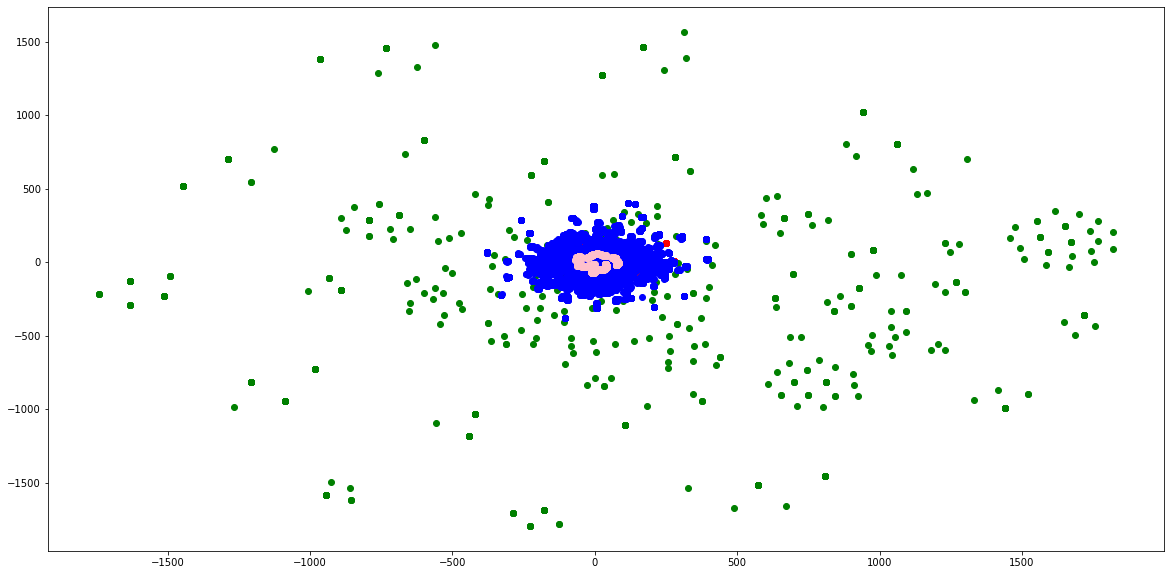

In [31]:
# Transform embeddings into 2D and plot them 
plt.figure(figsize=(20,10))
color = ["red", "green", "blue", "pink", "orange", "lightblue", "coral", "gray"]
for i, cluster in enumerate(clusters):
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(clusters[cluster]))
    plt.scatter(embeddings_en_2d[:, 0], embeddings_en_2d[:, 1], color = color[i])
plt.show()

## INSTRUCCIONS

FINS AQUI HEM FET LO Q DEMANEN (BASIC I UTILITZANT KMEANS)
per millorar-ho: utilitzar hierarchial clustering per poder explicar el num d clusters
+ guardar les ids dels tweets perq haurem de trobar les 5 paraules més importants de cada cluster

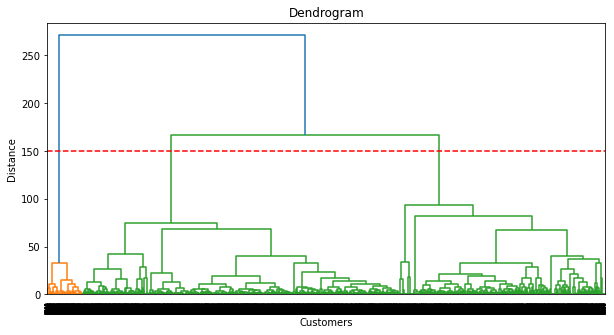

In [19]:
X = vectors
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')
plt.title("Dendrogram")
plt.ylabel("Distance")
plt.xlabel("Tweets")
plt.show()